# Exploratory Data Analysis

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

### Filter US Data Analyst Roles

In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

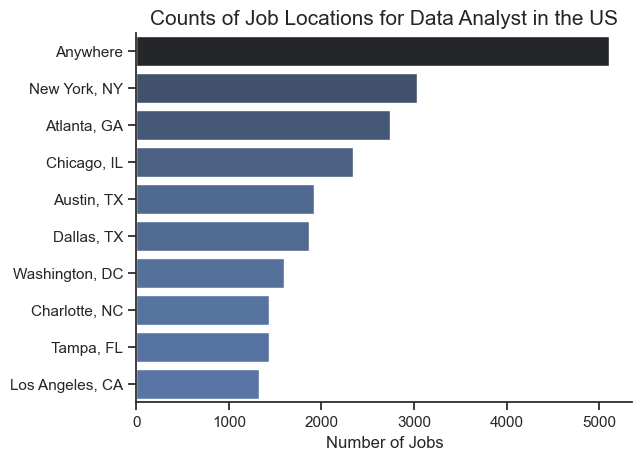

In [3]:
sns.set_theme(style='ticks')
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine() # remove the border from the grap
plt.title('Counts of Job Locations for Data Analyst in the US', fontsize=15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

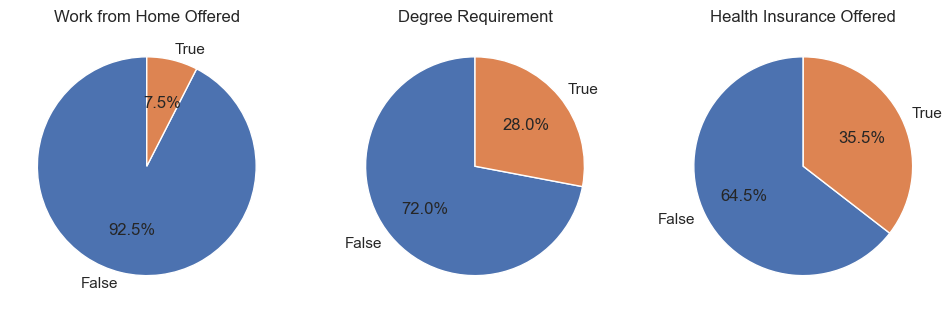

In [4]:
dict_column = {
  'job_work_from_home': 'Work from Home Offered',
  'job_no_degree_mention': 'Degree Requirement',
  'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
  ax[i].pie(df_DA_US[column].value_counts(), labels=[False, True], autopct='%1.1f%%', startangle=90)
  ax[i].set_title(title)


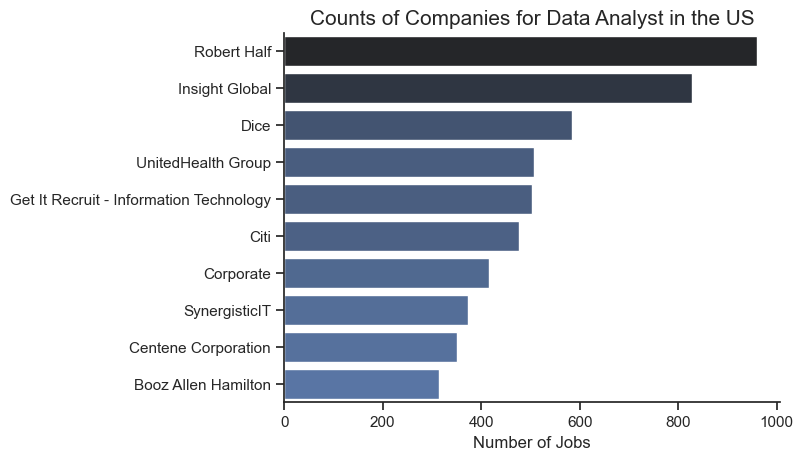

In [5]:
sns.set_theme(style='ticks')
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine() # remove the border from the grap
plt.title('Counts of Companies for Data Analyst in the US', fontsize=15)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()